#### pivot_table
A pivot table is a data summarization tool frequently found in spreadsheet programs and other data analysis software. It aggregates a table of data by one or more keys, arranging the data in a rectangle with some of the group keys along the rows and some along the columns. Pivot tables in Python with pandas are made possible through the groupby facility  combined with reshape operations utilizing hierarchical indexing. DataFrame has a pivot_table method, and there is also a top-level pandas.pivot_table function. In addition to providing a
convenience interface to groupby, pivot_table can add partial totals, also known as margins. Using in tipping dataset, suppose you wanted to compute a table of group means (the default pivot_table aggregation type) arranged by day and smoker on the rows:

In [2]:
import pandas as pd
import numpy as np

In [3]:
tips = pd.read_csv('tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [4]:
tips.pivot_table(index=['day', 'smoker'])

size       tip  total_bill
day  smoker                                
Fri  No      2.250000  2.812500   18.420000
     Yes     2.066667  2.714000   16.813333
Sat  No      2.555556  3.102889   19.661778
     Yes     2.476190  2.875476   21.276667
Sun  No      2.929825  3.167895   20.506667
     Yes     2.578947  3.516842   24.120000
Thur No      2.488889  2.673778   17.113111
     Yes     2.352941  3.030000   19.190588

Adding a column named tips_pct by calculating tip percentage of total bill

In [5]:
tips['tip_pct']=tips['tip']*100/tips['total_bill']

In [6]:
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,5.944673
1,10.34,1.66,No,Sun,Dinner,3,16.054159
2,21.01,3.50,No,Sun,Dinner,3,16.658734
3,23.68,3.31,No,Sun,Dinner,2,13.978041
4,24.59,3.61,No,Sun,Dinner,4,14.680765
5,25.29,4.71,No,Sun,Dinner,4,18.623962


Now, suppose we want to aggregate only tip_pct and size, and additionally group by time. I’ll put smoker in the table columns and day in the rows:

In [7]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker')

size              tip_pct           
smoker             No       Yes         No        Yes
time   day                                           
Dinner Fri   2.000000  2.222222  13.962237  16.534736
       Sat   2.555556  2.476190  15.804766  14.790607
       Sun   2.929825  2.578947  16.011294  18.725032
       Thur  2.000000       NaN  15.974441        NaN
Lunch  Fri   3.000000  1.833333  18.773467  18.893659
       Thur  2.500000  2.352941  16.031067  16.386327

Passing margins=True has the effect of adding all row and column labels, with corresponding values being the group statistics for all the data within a single tier:

In [8]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

size                        tip_pct                      
smoker             No       Yes       All         No        Yes        All
time   day                                                                
Dinner Fri   2.000000  2.222222  2.166667  13.962237  16.534736  15.891611
       Sat   2.555556  2.476190  2.517241  15.804766  14.790607  15.315172
       Sun   2.929825  2.578947  2.842105  16.011294  18.725032  16.689729
       Thur  2.000000       NaN  2.000000  15.974441        NaN  15.974441
Lunch  Fri   3.000000  1.833333  2.000000  18.773467  18.893659  18.876489
       Thur  2.500000  2.352941  2.459016  16.031067  16.386327  16.130074
All          2.668874  2.408602  2.569672  15.932846  16.319604  16.080258

To use a different aggregation function, pass it to aggfunc. For example, 'count' or len will give you a cross-tabulation (count or frequency) of group sizes:

In [9]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

If some combinations are empty (or otherwise NA), you may wish to pass a
fill_value:

In [10]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                columns='day', aggfunc='mean', fill_value=0)

day                       Fri        Sat        Sun       Thur
time   size smoker                                            
Dinner 1    No       0.000000  13.793103   0.000000   0.000000
            Yes      0.000000  32.573290   0.000000   0.000000
       2    No      13.962237  16.270460  16.885918  15.974441
            Yes     17.129708  14.866762  20.789307   0.000000
       3    No       0.000000  15.466050  15.266332   0.000000
            Yes      0.000000  14.499481  15.265982   0.000000
       4    No       0.000000  15.009608  14.814297   0.000000
            Yes     11.774956  12.451462  19.337004   0.000000
       5    No       0.000000   0.000000  20.692847   0.000000
            Yes      0.000000  10.657194   6.565988   0.000000
       6    No       0.000000   0.000000  10.379905   0.000000
Lunch  1    No       0.000000   0.000000   0.000000  18.172790
            Yes     22.377622   0.000000   0.000000   0.000000
       2    No       0.000000   0.000000   0.000000  16.600549
            Yes     18.196867   0.000000   0.000000  15.884253
       3    No      18.773467   0.000000   0.000000   8.424581
            Yes      0.000000   0.000000   0.000000  20.495178
       4    No       0.000000   0.000000   0.000000  13.891885
            Yes      0.000000   0.000000   0.000000  15.540960
       5    No       0.000000   0.000000   0.000000  12.138869
       6    No       0.000000   0.000000   0.000000  17.370592

###### pivot_table options
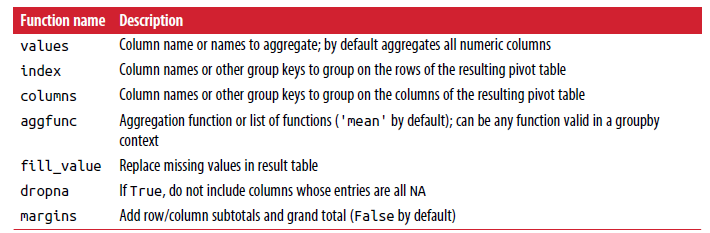

##### Crostabulation :> crosstab

In [11]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [12]:
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


As part of some survey analysis, we might want to summarize this data by nationality and handedness. You could use pivot_table to do this, but the pandas.crosstab function can be more convenient:

In [13]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


The first two arguments to crosstab can each either be an array or Series or a list of arrays. As in the tips data:

In [14]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244